# Projet 3 : Concevez une application au service de la santé publique #

### Import du nécessaire ###

In [11]:
import numpy as np
import annexe as an
# import plotly.graph_objs as go
import re
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)
pd.set_option('display.max_colwidth', None)
FICHIER ='F:/cour/OC/projet3/en.openfoodfacts.org.products.csv'

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Observations


Observons quelques lignes de notre fichier

In [ ]:
food_dataframe = pd.read_csv(FICHIER,sep='\t',low_memory=False)
display(food_dataframe.sample(10,random_state = 148625))

Observons la liste de colonnes

In [3]:
for column in dataframe.columns:
    print(column)

code
url
creator
created_t
created_datetime
last_modified_t
last_modified_datetime
product_name
abbreviated_product_name
generic_name
quantity
packaging
packaging_tags
packaging_text
brands
brands_tags
categories
categories_tags
categories_en
origins
origins_tags
origins_en
manufacturing_places
manufacturing_places_tags
labels
labels_tags
labels_en
emb_codes
emb_codes_tags
first_packaging_code_geo
cities
cities_tags
purchase_places
stores
countries
countries_tags
countries_en
ingredients_text
allergens
allergens_en
traces
traces_tags
traces_en
serving_size
serving_quantity
no_nutriments
additives_n
additives
additives_tags
additives_en
ingredients_from_palm_oil_n
ingredients_from_palm_oil
ingredients_from_palm_oil_tags
ingredients_that_may_be_from_palm_oil_n
ingredients_that_may_be_from_palm_oil
ingredients_that_may_be_from_palm_oil_tags
nutriscore_score
nutriscore_grade
nova_group
pnns_groups_1
pnns_groups_2
states
states_tags
states_en
brand_owner
ecoscore_score_fr
ecoscore_grade_fr


### Elements pertinant pour le sport
50% glucides : bon glucide **carbohydrates** on un faible indice glycémique **glycemic-index_100g
** (pain complet, pates de blé dur, légumineuse)
20% lipides (après l'effort pk pas, avant non) acide gras omégas 3 **'alpha-linolenic','eicosapentaenoic-acid','docosahexaenoic-acid' omega-3-fat** et omégas 6 (renforce coeur et circulation) (poisson eau froide saumon maquereau, huile végétal
15% proteines source précieuse de protéines : oeuf, viande maigre, produit laitier et legumineuses
3h entre le gros repas et sport (noix , morceau de choco avant le sport), blanc d'oeuf 2h d'interval, boire du lait écrémé
boire important pour l'acheminement des nutriment (riche en sodium), eau gazeuse plus jus de fruit apres l'effort(1 pour 1)
avant entrainnement: glucides(pates, pain complet), oeuf brouillées,fruit yaourt,pauvre en fibre
pendant celui-ci:eau, boisson isotonique,barre de muesli
apres:jus de pomme petillant avec une pincée de sel,pas de graisse,glucides, protéines de ahute qualité,produit laitier


Activité de moins de 30 min : Il n’est pas nécessaire de boire pendant l’effort
Activité de 30 à 60 min : il faut boire de 125 à 250 ml de liquide à toutes les 15 à 20 minutes.
Activité de 60 min, il ne faut pas attendre d’avoir soif pour boire de l’eau
Activité durant 1h à 3h : il est préférable de choisir une boisson contenant du sucre
Activité de plus de 3 h : préférez une boisson contenant du sucre et un peu de sel (pour le sodium). À noter que le sodium et le potassium dans la boisson de réhydratation ne sont pas indispensables si l’activité physique dure moins de 3 h à 4 h, à moins que la sudation engendrée par l’activité physique ne soit excessive.

Dataframe apres avoir garder que les colonnes pertinantes

In [6]:
dataframe_purify = an.open_csv_usefull_column()
# display(dataframe_purify.sample(10,random_state = 148625))

Voici quelques variables pertinentes pour un application orienté sport

In [20]:
trace_element_variables = ['sodium_100g','zinc_100g','copper_100g','potassium_100g','selenium_100g','manganese_100g','chromium_100g','iodine_100g']
acid_variables = ['omega-3-fat_100g','omega-6-fat_100g','omega-9-fat_100g']
vitamin_variables = ['vitamin-b1_100g','vitamin-b2_100g','vitamin-b6_100g']
sugar_variables = ['carbohydrates_100g','glycemic-index_100g','sugars_100g','-sucrose_100g','-glucose_100g','-fructose_100g','-lactose_100g','-maltose_100g','-maltodextrins_100g']
string_variables = ['pnns_groups_1','pnns_groups_2','nutriscore_score','nutriscore_grade','ecoscore_score_fr','ecoscore_grade_fr']

forme du dataframe avant et apres purification des colonnes avec valeurs abhérantes

In [12]:
copy_purify_for_test = dataframe_purify.copy()

In [54]:
copy2 = copy_purify_for_test[['carbohydrates_100g']].copy()
print(copy2.shape)
display(copy2[~copy2['carbohydrates_100g'].isna()])
for column in copy2.columns:
    quantile_min = np.nanquantile(copy2[column].to_numpy(),0.01)
    quantile_max = np.nanquantile(copy2[column].to_numpy(),0.99)
    mean = copy2[column].mean()
    print("quantile ",quantile_min,quantile_max," moyenne ",mean)
    copy2.drop(copy2[(((copy2[column] < quantile_min) & (abs(copy2[column] - mean) > 3 * mean)) | (copy2[column] < 0))].index,inplace=True)
    copy2.drop(copy2[(((copy2[column] > quantile_max) & (abs(copy2[column] - mean) > 3 * mean)) | (copy2[column] > 100))].index,inplace=True)
display(copy2[~copy2['carbohydrates_100g'].isna()])


(1760097, 1)


carbohydrates_100g
0                      70.1
3                       2.6
4                      29.0
6                       4.8
7                      10.0
...                     ...
1760088                35.0
1760089                 0.0
1760091                 2.0
1760094                 2.4
1760095                 8.0

[1389200 rows x 1 columns]

quantile  0.0 95.0  moyenne  28.870581817823762


carbohydrates_100g
0                      70.1
3                       2.6
4                      29.0
6                       4.8
7                      10.0
...                     ...
1760088                35.0
1760089                 0.0
1760091                 2.0
1760094                 2.4
1760095                 8.0

[1389050 rows x 1 columns]

In [ ]:


def remove_little_quantile3(entry_dataframe,column_list):
    mult_param = 3
    dataframe = entry_dataframe.copy()
    for column in column_list:
#         print(column)
        if len(dataframe[column].value_counts()) > 0:
#         display(dataframe.head(5))
#         dataframe.drop(dataframe[dataframe[column].apply(lambda x: not x.isnumeric())].index,inplace=True)
#         dataframe[column] = pd.to_numeric(dataframe[column])
            quantile_min = np.nanquantile(dataframe[column].to_numpy(),0.01)
            quantile_max = np.nanquantile(dataframe[column].to_numpy(),0.99)
            mean = dataframe[column].mean()
            dataframe.drop(dataframe[(((dataframe[column] < quantile_min) & (abs(dataframe[column] - mean) > mult_param * mean)) | (dataframe[column] < 0))].index,inplace=True)
            dataframe.drop(dataframe[(((dataframe[column] > quantile_max) & (abs(dataframe[column] - mean) > mult_param * mean)) | (dataframe[column] > 100))].index,inplace=True)
        else:
            dataframe.drop(column,axis = 'columns',inplace=True)
    dataframe = dataframe.dropna(axis = 'columns', how = 'all')
    differences_column = entry_dataframe.columns.difference(dataframe.columns)
    print("colonnes enlevé :",differences_column)
    return dataframe


regex = re.compile(".*_100g.*")
column_list = list(filter(regex.match, dataframe_purify.columns))
dataframe_purify2 = remove_little_quantile3(copy_purify_for_test['-capric-acid_100g'],['-capric-acid_100g'])



In [25]:
print("shape ",dataframe_purify.shape)
regex = re.compile(".*_100g.*")
column_list = list(filter(regex.match, dataframe_purify.columns))
dataframe_purify2 = an.remove_little_quantile2(copy_purify_for_test,column_list)
print("shape ",dataframe_purify2.shape)

shape  (1760097, 152)
colonnes enlevé : Index(['-capric-acid_100g', '-caprylic-acid_100g', '-dihomo-gamma-linolenic-acid_100g', '-stearic-acid_100g', 'beta-glucan_100g', 'casein_100g', 'chlorophyl_100g', 'choline_100g', 'glycemic-index_100g', 'nucleotides_100g', 'nutrition-score-uk_100g'], dtype='object')
shape  (449411, 141)


In [55]:
print("shape ",dataframe_purify.shape)
regex = re.compile(".*_100g.*")
column_list = list(filter(regex.match, dataframe_purify.columns))
an.remove_little_quantile(dataframe_purify,column_list)
print("shape ",dataframe_purify.shape)

shape  (1760097, 152)
shape  (1611486, 150)


In [ ]:
dataframe_purify[]  #### essayer de caculer le nombre de ligne en moins avec des valeurs au dessus de 100 ou en dessous de 0 et voir si ça correspond au 10% de valeurs en moins

Visualisation de si l'algorythme a bien enlever les valeurs abhérentes

In [5]:
for elem in sugar_variables:
    print("\n\ncolumn : ",elem )
    display("max :",dataframe_purify[elem].max())
    display("min :",dataframe_purify[elem].min())
    display("moyenne :",dataframe_purify[elem].mean())
    display("mediane :",dataframe_purify[elem].median())
    display(dataframe_purify[elem].value_counts().head(10))#.sample(10,random_state = 148625))  



column :  carbohydrates_100g


'max :'

95.2

'min :'

0.0

'moyenne :'

27.7051570521451

'mediane :'

15.42

0.0     78821
0.5     31806
1.0     23477
11.0    11975
12.0    11890
50.0    10487
10.0    10378
60.0     9673
13.0     9371
2.0      9254
Name: carbohydrates_100g, dtype: int64



column :  glycemic-index_100g


'max :'

30.0

'min :'

30.0

'moyenne :'

30.0

'mediane :'

30.0

30.0    1
Name: glycemic-index_100g, dtype: int64



column :  sugars_100g


'max :'

76.19

'min :'

0.0

'moyenne :'

12.421005105850124

'mediane :'

3.6382000000000003

0.00    165242
0.50     63326
1.00     29025
2.00     15640
0.10     14759
3.00     12892
0.60     12755
0.70     12711
0.80     11551
3.57     11225
Name: sugars_100g, dtype: int64



column :  -sucrose_100g


'max :'

43.5

'min :'

0.0

'moyenne :'

11.09693548387097

'mediane :'

8.0

0.00     10
2.23      7
26.00     5
0.10      5
5.20      5
43.50     5
7.00      4
7.50      4
8.00      3
0.30      3
Name: -sucrose_100g, dtype: int64



column :  -glucose_100g


'max :'

53.3

'min :'

0.0

'moyenne :'

7.82863636366515

'mediane :'

2.1100000000000003

0.2     8
30.0    5
8.1     3
0.5     3
2.0     3
0.0     2
8.2     2
15.0    2
2.4     2
1.4     2
Name: -glucose_100g, dtype: int64



column :  -fructose_100g


'max :'

63.9

'min :'

0.0

'moyenne :'

23.255538461538457

'mediane :'

19.6

0.0     5
40.0    5
53.0    4
0.2     4
55.1    3
56.1    2
0.7     2
3.0     2
0.1     2
0.9     2
Name: -fructose_100g, dtype: int64



column :  -lactose_100g


'max :'

56.5

'min :'

0.0

'moyenne :'

2.4238643439761898

'mediane :'

0.01

0.0000    272
0.0100    103
0.1000     98
1.0000     37
2.9800     21
0.5000     11
0.2000      8
4.8000      8
3.0000      4
0.0001      3
Name: -lactose_100g, dtype: int64



column :  -maltose_100g


'max :'

64.3

'min :'

0.0

'moyenne :'

8.291093345833334

'mediane :'

0.3417

0.000000     2
1.370000     1
0.000757     1
0.000011     1
22.000000    1
0.800000     1
0.500000     1
1.000000     1
13.000000    1
0.100000     1
Name: -maltose_100g, dtype: int64



column :  -maltodextrins_100g


'max :'

34.4

'min :'

3e-07

'moyenne :'

2.8302933339393945

'mediane :'

0.12

0.12000     13
0.00012      5
1.50000      3
0.20000      2
14.80000     1
10.30000     1
0.22600      1
0.86000      1
3.40000      1
2.20000      1
Name: -maltodextrins_100g, dtype: int64

Affichage des variable string avant et apres traitement pour enlever les majuscule et les tiret

In [31]:
for elem in string_variables:
    display(dataframe_purify[elem].value_counts())


unknown                    863447
sugary snacks               97565
fish meat eggs              72814
milk and dairy products     70808
cereals and potatoes        64683
beverages                   56340
composite foods             47693
fruits and vegetables       40339
fat and sauces              34015
salty snacks                17640
Name: pnns_groups_1, dtype: int64

unknown                             863447
biscuits and cakes                   51602
one dish meals                       37231
sweets                               36255
dressings and sauces                 31718
cereals                              29722
milk and yogurt                      29524
cheese                               28698
processed meat                       24164
meat                                 23829
fish and seafood                     21095
vegetables                           21052
bread                                19683
sweetened beverages                  18722
alcoholic beverages                  15185
fruits                               13338
appetizers                            8943
unsweetened beverages                 8622
fruit juices                          8496
salty and fatty products              7492
artificially sweetened beverages      7239
pizza pies and quiche                 6864
breakfast cereals                     6734
ice cream  

 0.0     29274
 2.0     24657
 3.0     23944
 1.0     23662
-1.0     21752
 4.0     21290
 11.0    20648
 13.0    19874
 12.0    19646
 14.0    19471
 15.0    18180
 5.0     17898
 16.0    17077
-4.0     16492
-2.0     14771
-3.0     13609
 17.0    12548
 18.0    11974
 6.0     11848
 19.0    10867
 10.0    10768
 7.0      9974
 20.0     9517
 8.0      9303
-5.0      9081
 9.0      8918
 21.0     8337
-6.0      6994
 22.0     6641
 23.0     6493
 24.0     6270
 25.0     5150
 26.0     4787
Name: nutriscore_score, dtype: int64

d    133788
c    107277
a     83719
b     74664
e     72267
Name: nutriscore_grade, dtype: int64

 39.0     25474
 43.0     11263
 29.0     10047
 36.0      9343
 67.0      7871
 55.0      7095
 41.0      6998
 34.0      6876
 9.0       6876
 82.0      6766
 35.0      6647
 33.0      6558
 45.0      5946
 76.0      5805
 42.0      5782
 79.0      5704
 18.0      5662
 60.0      5577
 85.0      5531
 80.0      5455
 59.0      5265
 63.0      5186
 65.0      4991
 81.0      4935
 22.0      4552
 54.0      4355
 75.0      4334
 83.0      4287
 64.0      4122
 19.0      4059
 72.0      4024
 77.0      3593
 50.0      3390
 21.0      3340
 78.0      3313
 24.0      2727
 51.0      2692
 73.0      2593
 74.0      2568
 52.0      2517
 26.0      2453
 31.0      2383
 84.0      2327
 20.0      2324
 23.0      2271
 70.0      2252
 66.0      2223
 30.0      2214
 27.0      2149
 53.0      2137
 44.0      2113
 12.0      2053
 91.0      2017
 56.0      2013
 69.0      1936
 6.0       1903
 28.0      1849
 32.0      1758
 49.0      1702
 10.0      1681
 71.0      1548
 68.0      1488
 62.0   

b    107798
d     96832
c     70455
e     33745
a     14215
Name: ecoscore_grade_fr, dtype: int64

In [5]:
an.text_regularisation(dataframe_purify,['pnns_groups_1','pnns_groups_2'])
for elem in string_variables:
    display(dataframe_purify[elem].value_counts())

unknown                    993387
sugary snacks              127984
fish meat eggs              85850
milk and dairy products     82248
cereals and potatoes        74082
beverages                   59611
composite foods             50634
fruits and vegetables       47474
fat and sauces              45195
salty snacks                28749
Name: pnns_groups_1, dtype: int64

unknown                             993387
biscuits and cakes                   57831
sweets                               53618
dressings and sauces                 40874
one dish meals                       39864
cheese                               39099
cereals                              34587
processed meat                       33414
milk and yogurt                      30337
meat                                 25512
vegetables                           24350
fish and seafood                     23019
bread                                20716
sweetened beverages                  20182
fruits                               15369
alcoholic beverages                  15293
salty and fatty products             12623
chocolate products                   11270
appetizers                           10406
unsweetened beverages                 9110
fruit juices                          8648
breakfast cereals                     8399
artificially sweetened beverages      8002
legumes    

 0.0     31266
 14.0    27908
 13.0    27227
 2.0     26687
 11.0    25740
 3.0     25609
 1.0     25454
 12.0    24449
 15.0    24351
-1.0     23312
 4.0     23038
 16.0    23029
 5.0     19388
 17.0    17770
-4.0     17747
 18.0    16458
-2.0     16093
 19.0    15218
-3.0     14855
 10.0    14254
 6.0     13640
 20.0    13603
 9.0     12232
 21.0    12000
 7.0     11984
 8.0     11859
-5.0     10387
 24.0    10116
 22.0     9665
 23.0     9416
 25.0     9107
-6.0      8280
 26.0     8082
 27.0     4783
-7.0      3327
Name: nutriscore_score, dtype: int64

d    181132
c    125437
e    106537
a     95019
b     80209
Name: nutriscore_grade, dtype: int64

 39.0     29960
 43.0     12823
 34.0     11482
 29.0     11007
 9.0      10518
 36.0      9660
 67.0      9479
 55.0      7844
 41.0      7778
 45.0      7416
 33.0      7405
 42.0      7340
 82.0      7295
 35.0      7236
 19.0      7167
 60.0      6971
 80.0      6678
 85.0      6427
 18.0      6257
 63.0      6094
 76.0      6005
 79.0      5978
 21.0      5747
 59.0      5576
 65.0      5266
 81.0      5225
 75.0      4942
 22.0      4773
 54.0      4650
 83.0      4609
 64.0      4434
 72.0      4267
 74.0      4116
 77.0      4032
 24.0      3786
 50.0      3566
 30.0      3517
 78.0      3473
 20.0      2914
 51.0      2870
 6.0       2807
 73.0      2772
 26.0      2726
 52.0      2692
 31.0      2628
 56.0      2594
 84.0      2577
 23.0      2465
 66.0      2452
 70.0      2350
-8.0       2342
 44.0      2337
 53.0      2272
 12.0      2271
 27.0      2255
 49.0      2220
 91.0      2153
 32.0      2135
 69.0      2090
 28.0      2002
-4.0       1949
 10.0      1844
 68.0   

b    121574
d    116792
c     81008
e     47874
a     15947
Name: ecoscore_grade_fr, dtype: int64

matrice de correlation des variables numériques

In [6]:
correlation_dataframe = dataframe_purify.corr(method='pearson')
display(correlation_dataframe)

serving_quantity  nutriscore_score  ecoscore_score_fr  energy-kj_100g  energy-kcal_100g  energy_100g  energy-from-fat_100g  fat_100g  saturated-fat_100g  -butyric-acid_100g  -caproic-acid_100g  -capric-acid_100g  -lauric-acid_100g  -myristic-acid_100g  -palmitic-acid_100g  -stearic-acid_100g  -arachidic-acid_100g  -behenic-acid_100g  -lignoceric-acid_100g  -cerotic-acid_100g  -montanic-acid_100g  -melissic-acid_100g  monounsaturated-fat_100g  \
serving_quantity                                 1.000000         -0.012933          -0.001175       -0.006137          0.003262    -0.002311             -0.254859 -0.001372           -0.004934                -1.0                 NaN                NaN                NaN                  NaN            -0.474752                 NaN             -0.043591           -0.476956                    NaN                 NaN            -0.259410                  NaN                 -0.104526   
nutriscore_score                                -0.012933          1.000000          -0.342295        0.599187          0.603813     0.605880              0.405349  0.602753            0.670336                 NaN                 NaN                1.0                NaN                  1.0            -0.180600                 NaN             -0.032071            0.209063                    NaN                 NaN            -0.819204                  NaN                  0.331431   
ecoscore_score_fr                               -0.001175         -0.342295           1.000000       -0.254984         -0.238618    -0.241430             -0.265100 -0.313109           -0.277298                 NaN                 NaN                NaN                NaN                  NaN                  NaN                 NaN              0.136970           -0.416785                    NaN                 1.0             0.746280                  NaN                 -0.101095   
energy-kj_100g                                  -0.006137          0.599187          -0.254984        1.000000          0.968742     1.000000              0.739736  0.761840            0.608270                 NaN                 NaN                NaN                NaN                  NaN                  NaN                 NaN              0.212625                 NaN                    NaN                 NaN                  NaN                  NaN                  0.700404   
energy-kcal_100g                                 0.003262          0.603813          -0.238618        0.968742          1.000000     0.998379              0.548615  0.742888            0.566412                 NaN                 NaN               -1.0                NaN                  1.0             0.167752                 NaN              0.005761            0.263546                    NaN                 NaN             0.930255                  NaN                  0.624139   
energy_100g                                     -0.002311          0.605880          -0.241430        1.000000          0.998379     1.000000              0.554684  0.743333            0.568667                 NaN                 NaN               -1.0                NaN                  1.0             0.167871                 NaN              0.004096            0.263426                    NaN                 NaN             0.930406                  NaN                  0.624171   
energy-from-fat_100g                            -0.254859          0.405349          -0.265100        0.739736          0.548615     0.554684              1.000000  0.713127            0.587532                 NaN                 NaN                NaN                NaN                  NaN                  NaN                 NaN             -1.000000                 NaN                    NaN                 NaN                  NaN                  NaN                  0.535440   
fat_100g                                        -0.001372          0.602753          -0.313109        0.761840          0

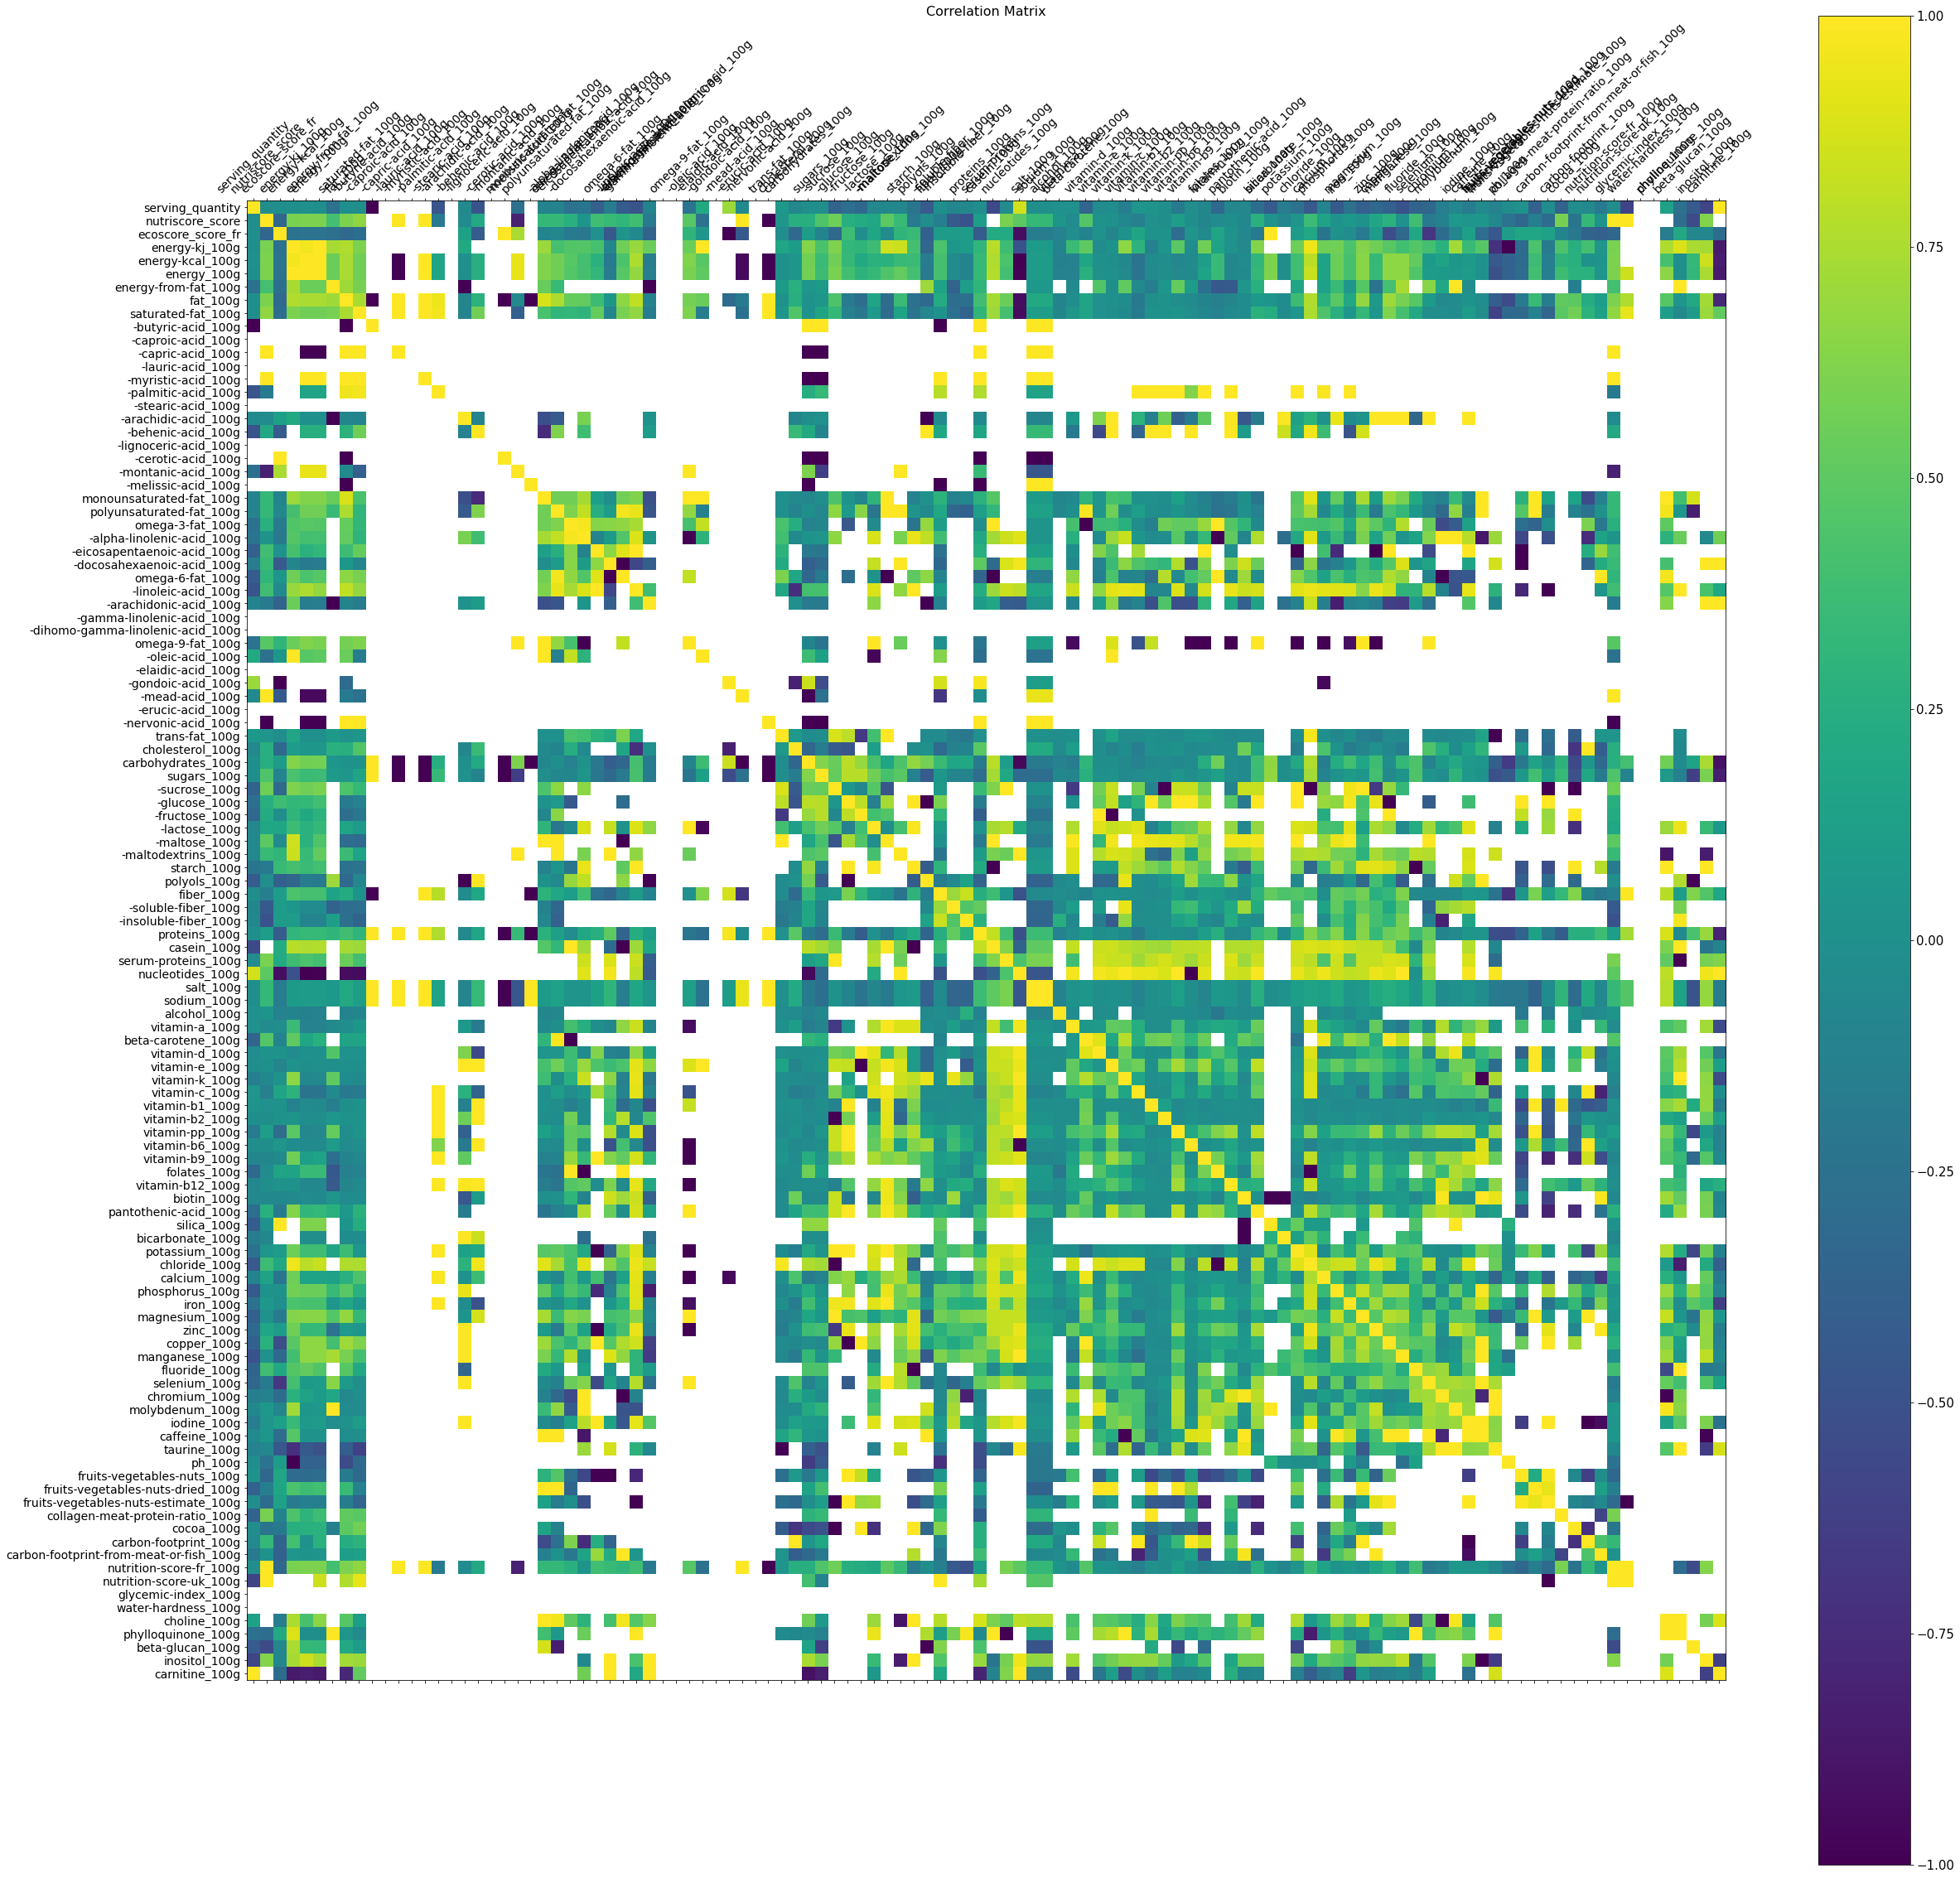

In [13]:
# plt.matshow(correlation_dataframe)
#plotly a des heatmap interactive donc le refaire avec

f = plt.figure(figsize=(40, 40))
plt.matshow(correlation_dataframe, fignum=f.number)
plt.xticks(range(correlation_dataframe.select_dtypes(['number']).shape[1]), correlation_dataframe.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(correlation_dataframe.select_dtypes(['number']).shape[1]), correlation_dataframe.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=15)
plt.title('Correlation Matrix', fontsize=16);

In [10]:
# rs = np.random.RandomState(0)
# df = pd.DataFrame(rs.rand(10, 10))
# corr = df.corr()
correlation_dataframe.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

F:\programme\anaconda\envs\envprojet3\lib\site-packages\pandas\io\formats\style.py:1264: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
F:\programme\anaconda\envs\envprojet3\lib\site-packages\pandas\io\formats\style.py:1265: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


variables qui ont une corrélation de 1

In [24]:
an.variables_correlation_over_parameter(correlation_dataframe,1)

serving_quantity carnitine_100g
nutriscore_score -capric-acid_100g
nutriscore_score -myristic-acid_100g
nutriscore_score nutrition-score-fr_100g
nutriscore_score nutrition-score-uk_100g
ecoscore_score_fr -cerotic-acid_100g
ecoscore_score_fr silica_100g
energy-kj_100g energy_100g
energy-kcal_100g -myristic-acid_100g
energy_100g -myristic-acid_100g
fat_100g -capric-acid_100g
fat_100g -myristic-acid_100g
fat_100g -nervonic-acid_100g
saturated-fat_100g -myristic-acid_100g
saturated-fat_100g -nervonic-acid_100g
-butyric-acid_100g carbohydrates_100g
-butyric-acid_100g sugars_100g
-capric-acid_100g proteins_100g
-capric-acid_100g sodium_100g
-capric-acid_100g nutrition-score-fr_100g
-myristic-acid_100g fiber_100g
-palmitic-acid_100g vitamin-c_100g
-palmitic-acid_100g vitamin-pp_100g
-palmitic-acid_100g vitamin-b9_100g
-palmitic-acid_100g vitamin-b12_100g
-palmitic-acid_100g potassium_100g
-palmitic-acid_100g iron_100g
-arachidic-acid_100g copper_100g
-arachidic-acid_100g manganese_100g
-arach

In [20]:
dataframe_copy = dataframe_purify.copy()

In [9]:
dataframe_copy['iodine_100g'].iloc[52410]

nan

regarde les valeurs entre deux variables avec correlation de 1.  
affiche toute les 100000 valeur nan

In [12]:

variable1 = '-mead-acid_100g'
variable2 = 'caffeine_100g'
compt = 0
for row in range(dataframe_purify.shape[0]):
    if not np.isnan(dataframe_purify[variable1].iloc[row]) and not np.isnan(dataframe_purify[variable2].iloc[row]):
        display(dataframe_copy[variable1].iloc[row])
        display(dataframe_copy[variable2].iloc[row])
        print(row)
    else:
        compt += 1
        if compt == 100000:
            print(100000)
            compt = 0

100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000


regarde les 5 premieres valeurs des variables ou la corrélation est de 1  
sinon affiche une ligne de "+" quand toutes les valeur d'une variable sont en vis a vis avec que des nan sur l'autre variables 

In [23]:
for num,column in enumerate(correlation_dataframe.columns):
    for row1 in correlation_dataframe.columns[num+1:]:
        comptnan = 0
        comptvalues  = 0
        #utiliser un masque pour accelerer le process -----------------------------------------------------------
        if correlation_dataframe[column][row1] == 1:
            for row2 in range(dataframe_copy.shape[0]):
                if not np.isnan(dataframe_copy[column].iloc[row2]) and not np.isnan(dataframe_copy[row1].iloc[row2]):
                    display(column,dataframe_copy[column].iloc[row2],row1,dataframe_copy[row1].iloc[row2])
                    print("-----------------------------")
                    comptvalues += 1
                else:
                    comptnan += 1
                if comptvalues == 5 :
                    print("++++++++++++++++++++++++++++")
                    break
                elif comptnan == dataframe_copy.shape[0] : 
                    print("no data matches between: ",column," and ",row1)

'serving_quantity'

449.0

'carnitine_100g'

0.015

-----------------------------


'serving_quantity'

102.9

'carnitine_100g'

0.007

-----------------------------


'nutriscore_score'

19.0

'-capric-acid_100g'

0.82

-----------------------------


'nutriscore_score'

13.0

'-capric-acid_100g'

0.006

-----------------------------


'nutriscore_score'

10.0

'-myristic-acid_100g'

0.36

-----------------------------


'nutriscore_score'

1.0

'-myristic-acid_100g'

0.077

-----------------------------


'nutriscore_score'

18.0

'nutrition-score-fr_100g'

18.0

-----------------------------


'nutriscore_score'

1.0

'nutrition-score-fr_100g'

1.0

-----------------------------


'nutriscore_score'

14.0

'nutrition-score-fr_100g'

14.0

-----------------------------


'nutriscore_score'

-2.0

'nutrition-score-fr_100g'

-2.0

-----------------------------


'nutriscore_score'

1.0

'nutrition-score-fr_100g'

1.0

-----------------------------
++++++++++++++++++++++++++++


'nutriscore_score'

3.0

'nutrition-score-uk_100g'

3.0

-----------------------------


'nutriscore_score'

1.0

'nutrition-score-uk_100g'

1.0

-----------------------------


'ecoscore_score_fr'

36.0

'-cerotic-acid_100g'

0.03

-----------------------------


'ecoscore_score_fr'

32.0

'-cerotic-acid_100g'

0.0

-----------------------------


'energy-kj_100g'

936.0

'energy_100g'

936.0

-----------------------------


'energy-kj_100g'

1513.0

'energy_100g'

1513.0

-----------------------------


'energy-kj_100g'

2179.0

'energy_100g'

2179.0

-----------------------------


'energy-kj_100g'

5.0

'energy_100g'

5.0

-----------------------------


'energy-kj_100g'

450.0

'energy_100g'

450.0

-----------------------------
++++++++++++++++++++++++++++


'energy_100g'

937.0

'-myristic-acid_100g'

0.36

-----------------------------


'energy_100g'

297.0

'-myristic-acid_100g'

0.077

-----------------------------


'fat_100g'

27.0

'-capric-acid_100g'

0.82

-----------------------------


'fat_100g'

12.0

'-capric-acid_100g'

0.006

-----------------------------


'fat_100g'

17.3

'-myristic-acid_100g'

0.36

-----------------------------


'fat_100g'

0.2

'-myristic-acid_100g'

0.077

-----------------------------


'saturated-fat_100g'

17.9

'-nervonic-acid_100g'

0.1

-----------------------------


'saturated-fat_100g'

10.1

'-nervonic-acid_100g'

0.0055

-----------------------------


'-butyric-acid_100g'

0.58

'sugars_100g'

30.0

-----------------------------


'-butyric-acid_100g'

0.00365

'sugars_100g'

13.2

-----------------------------


'-capric-acid_100g'

0.82

'proteins_100g'

26.0

-----------------------------


'-capric-acid_100g'

0.006

'proteins_100g'

24.0

-----------------------------


'-capric-acid_100g'

0.82

'sodium_100g'

0.52

-----------------------------


'-capric-acid_100g'

0.006

'sodium_100g'

0.3

-----------------------------


'-capric-acid_100g'

0.82

'nutrition-score-fr_100g'

19.0

-----------------------------


'-capric-acid_100g'

0.006

'nutrition-score-fr_100g'

13.0

-----------------------------


'-myristic-acid_100g'

0.36

'fiber_100g'

1.0

-----------------------------


'-myristic-acid_100g'

0.077

'fiber_100g'

0.03

-----------------------------


'-palmitic-acid_100g'

0.000377

'vitamin-c_100g'

0.00667

-----------------------------


'-palmitic-acid_100g'

4.23e-07

'vitamin-c_100g'

1.02e-05

-----------------------------


'-palmitic-acid_100g'

0.000377

'vitamin-b12_100g'

1.45e-07

-----------------------------


'-palmitic-acid_100g'

0.002

'vitamin-b12_100g'

2e-06

-----------------------------


'-palmitic-acid_100g'

0.000377

'potassium_100g'

0.0812

-----------------------------


'-palmitic-acid_100g'

0.185

'potassium_100g'

0.43

-----------------------------


'-palmitic-acid_100g'

0.000377

'iron_100g'

0.000522

-----------------------------


'-palmitic-acid_100g'

0.00518

'iron_100g'

0.0128

-----------------------------


'-arachidic-acid_100g'

0.004

'copper_100g'

5e-05

-----------------------------


'-arachidic-acid_100g'

0.35

'copper_100g'

0.00085

-----------------------------


'-arachidic-acid_100g'

0.004

'manganese_100g'

5e-06

-----------------------------


'-arachidic-acid_100g'

0.35

'manganese_100g'

0.00095

-----------------------------


'-arachidic-acid_100g'

0.004

'selenium_100g'

2.9e-06

-----------------------------


'-arachidic-acid_100g'

0.35

'selenium_100g'

2.7e-05

-----------------------------


'-arachidic-acid_100g'

0.004

'iodine_100g'

1.3e-05

-----------------------------


'-arachidic-acid_100g'

0.35

'iodine_100g'

7e-05

-----------------------------


'-behenic-acid_100g'

0.179

'polyols_100g'

15.0

-----------------------------


'-behenic-acid_100g'

0.013

'polyols_100g'

8.8

-----------------------------


'-behenic-acid_100g'

0.013

'vitamin-e_100g'

0.0054

-----------------------------


'-behenic-acid_100g'

0.0015

'vitamin-e_100g'

0.0023333333333333

-----------------------------


'-behenic-acid_100g'

0.013

'vitamin-b2_100g'

0.0011

-----------------------------


'-behenic-acid_100g'

0.0015

'vitamin-b2_100g'

0.0003

-----------------------------


'-behenic-acid_100g'

0.013

'vitamin-b6_100g'

0.00084

-----------------------------


'-behenic-acid_100g'

0.0015

'vitamin-b6_100g'

0.0003

-----------------------------


'-behenic-acid_100g'

0.013

'vitamin-b12_100g'

2.3e-06

-----------------------------


'-behenic-acid_100g'

0.0015

'vitamin-b12_100g'

7.5e-07

-----------------------------


'-melissic-acid_100g'

0.0007

'salt_100g'

0.04

-----------------------------


'-melissic-acid_100g'

0.028

'salt_100g'

1.11

-----------------------------


'-melissic-acid_100g'

0.0007

'sodium_100g'

0.016

-----------------------------


'-melissic-acid_100g'

0.028

'sodium_100g'

0.445

-----------------------------


'monounsaturated-fat_100g'

0.0

'caffeine_100g'

0.0

-----------------------------


'monounsaturated-fat_100g'

3.62

'caffeine_100g'

0.0362

-----------------------------


'monounsaturated-fat_100g'

21.0

'fruits-vegetables-nuts-dried_100g'

4.0

-----------------------------


'monounsaturated-fat_100g'

23.0

'fruits-vegetables-nuts-dried_100g'

10.0

-----------------------------


'polyunsaturated-fat_100g'

0.436

'-maltodextrins_100g'

0.147

-----------------------------


'polyunsaturated-fat_100g'

2.1e-06

'-maltodextrins_100g'

9.9e-05

-----------------------------


'polyunsaturated-fat_100g'

0.01

'caffeine_100g'

0.0

-----------------------------


'polyunsaturated-fat_100g'

0.845

'caffeine_100g'

0.0362

-----------------------------


'polyunsaturated-fat_100g'

2.6

'fruits-vegetables-nuts-dried_100g'

4.0

-----------------------------


'polyunsaturated-fat_100g'

3.9

'fruits-vegetables-nuts-dried_100g'

10.0

-----------------------------


'-alpha-linolenic-acid_100g'

0.055

'chromium_100g'

5.8e-06

-----------------------------


'-alpha-linolenic-acid_100g'

0.21

'chromium_100g'

2.1e-05

-----------------------------


'omega-6-fat_100g'

0.4

'folates_100g'

3.2e-05

-----------------------------


'omega-6-fat_100g'

3.2

'folates_100g'

8.1e-05

-----------------------------


'-arachidonic-acid_100g'

0.082

'inositol_100g'

0.029

-----------------------------


'-arachidonic-acid_100g'

0.059

'inositol_100g'

0.024

-----------------------------


'omega-9-fat_100g'

1.08

'magnesium_100g'

0.0091

-----------------------------


'omega-9-fat_100g'

2.4e-05

'magnesium_100g'

9.9e-08

-----------------------------


'omega-9-fat_100g'

1.08

'selenium_100g'

1.35e-06

-----------------------------


'omega-9-fat_100g'

2.4e-05

'selenium_100g'

2.1e-09

-----------------------------


'-mead-acid_100g'

0.02

'nutrition-score-fr_100g'

-2.0

-----------------------------


'-mead-acid_100g'

0.0054

'nutrition-score-fr_100g'

-5.0

-----------------------------


'-nervonic-acid_100g'

0.1

'proteins_100g'

25.0

-----------------------------


'-nervonic-acid_100g'

0.0055

'proteins_100g'

4.3

-----------------------------


'-nervonic-acid_100g'

0.1

'salt_100g'

1.8

-----------------------------


'-nervonic-acid_100g'

0.0055

'salt_100g'

0.47498

-----------------------------


'trans-fat_100g'

0.00038

'-maltose_100g'

0.12

-----------------------------


'trans-fat_100g'

1.7e-07

'-maltose_100g'

1.13e-05

-----------------------------


'cholesterol_100g'

0.01

'carbon-footprint_100g'

500.0

-----------------------------


'cholesterol_100g'

0.0

'carbon-footprint_100g'

150.0

-----------------------------


'-sucrose_100g'

0.3

'serum-proteins_100g'

0.3

-----------------------------


'-sucrose_100g'

0.8

'serum-proteins_100g'

0.4

-----------------------------


'-sucrose_100g'

0.3

'serum-proteins_100g'

0.3

-----------------------------


'-sucrose_100g'

0.3

'serum-proteins_100g'

0.3

-----------------------------


'-glucose_100g'

17.9

'starch_100g'

10.1

-----------------------------


'-glucose_100g'

0.2

'starch_100g'

1.4

-----------------------------


'-glucose_100g'

8.1

'potassium_100g'

0.36

-----------------------------


'-glucose_100g'

0.2

'potassium_100g'

0.08

-----------------------------


'-glucose_100g'

0.9

'fruits-vegetables-nuts-estimate_100g'

12.0

-----------------------------


'-glucose_100g'

15.0

'fruits-vegetables-nuts-estimate_100g'

52.0

-----------------------------


'-glucose_100g'

15.0

'fruits-vegetables-nuts-estimate_100g'

52.0

-----------------------------


'-fructose_100g'

0.1

'vitamin-d_100g'

6e-07

-----------------------------


'-fructose_100g'

6.0

'vitamin-d_100g'

1.08e-05

-----------------------------


'-maltose_100g'

4.8

'selenium_100g'

3.9e-06

-----------------------------


'-maltose_100g'

7.2e-05

'selenium_100g'

2.1e-09

-----------------------------


'vitamin-b1_100g'

0.000165

'fruits-vegetables-nuts-dried_100g'

0.0

-----------------------------


'vitamin-b1_100g'

0.0012

'fruits-vegetables-nuts-dried_100g'

3.0

-----------------------------


'vitamin-b1_100g'

0.0019

'collagen-meat-protein-ratio_100g'

15.0

-----------------------------


'vitamin-b1_100g'

4.8e-05

'collagen-meat-protein-ratio_100g'

12.0

-----------------------------


'vitamin-b6_100g'

0.0012

'carbon-footprint_100g'

265.0

-----------------------------


'vitamin-b6_100g'

0.00037

'carbon-footprint_100g'

125.0

-----------------------------


'magnesium_100g'

0.00014

'fruits-vegetables-nuts-dried_100g'

0.0

-----------------------------


'magnesium_100g'

0.07

'fruits-vegetables-nuts-dried_100g'

23.0

-----------------------------


'magnesium_100g'

0.08

'carbon-footprint_100g'

150.0

-----------------------------


'magnesium_100g'

0.0026

'carbon-footprint_100g'

0.0

-----------------------------


'copper_100g'

9.66e-05

'caffeine_100g'

0.0362

-----------------------------


'copper_100g'

0.00085

'caffeine_100g'

0.835

-----------------------------


'chromium_100g'

5.8e-06

'taurine_100g'

0.0053

-----------------------------


'chromium_100g'

1.3e-05

'taurine_100g'

0.028

-----------------------------


'molybdenum_100g'

5.8e-06

'taurine_100g'

0.0053

-----------------------------


'molybdenum_100g'

2.2e-05

'taurine_100g'

0.028

-----------------------------


'iodine_100g'

7.25e-06

'caffeine_100g'

0.0362

-----------------------------


'iodine_100g'

7e-05

'caffeine_100g'

0.835

-----------------------------


'nutrition-score-fr_100g'

3.0

'nutrition-score-uk_100g'

3.0

-----------------------------


'nutrition-score-fr_100g'

13.0

'nutrition-score-uk_100g'

13.0

-----------------------------


'nutrition-score-fr_100g'

1.0

'nutrition-score-uk_100g'

1.0

-----------------------------


'nutrition-score-fr_100g'

22.0

'nutrition-score-uk_100g'

22.0

-----------------------------


'nutrition-score-fr_100g'

10.0

'nutrition-score-uk_100g'

10.0

-----------------------------
++++++++++++++++++++++++++++


'choline_100g'

0.066

'phylloquinone_100g'

3.3e-05

-----------------------------


'choline_100g'

0.069

'phylloquinone_100g'

3.5e-05

-----------------------------


relation glucide sucre

<AxesSubplot:xlabel='carbohydrates_100g', ylabel='sugars_100g'>

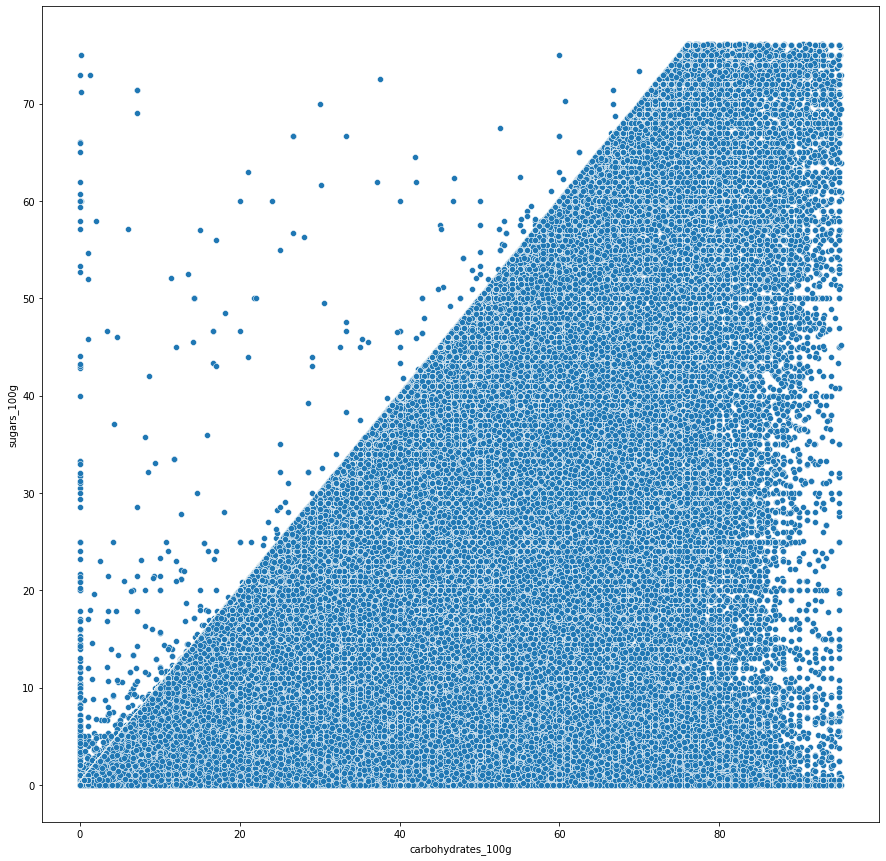

In [30]:
f = plt.figure(figsize=(15, 15))

sns.scatterplot(data=dataframe_purify, x="carbohydrates_100g", y="sugars_100g")

relation glucide fibre

<AxesSubplot:xlabel='carbohydrates_100g', ylabel='fiber_100g'>

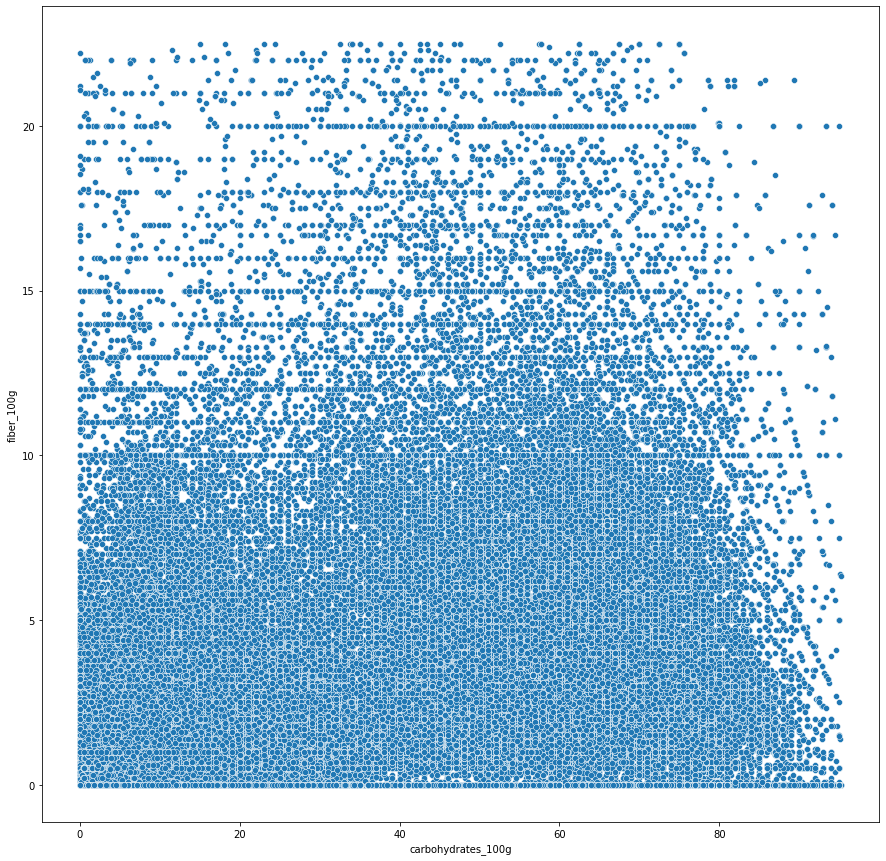

In [28]:
f = plt.figure(figsize=(15, 15))

sns.scatterplot(data=dataframe_purify, x="carbohydrates_100g", y="fiber_100g")

relation glucide amidon

<AxesSubplot:xlabel='carbohydrates_100g', ylabel='starch_100g'>

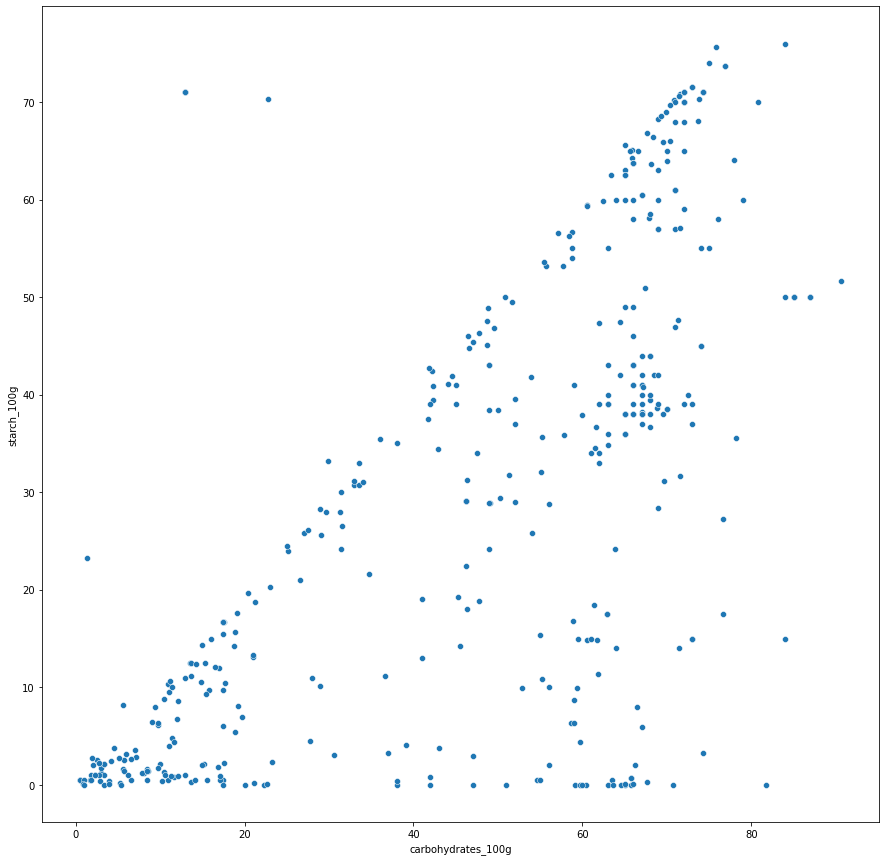

In [29]:
f = plt.figure(figsize=(15, 15))

sns.scatterplot(data=dataframe_purify, x="carbohydrates_100g", y="starch_100g")

relation amidon fibre

<AxesSubplot:xlabel='starch_100g', ylabel='fiber_100g'>

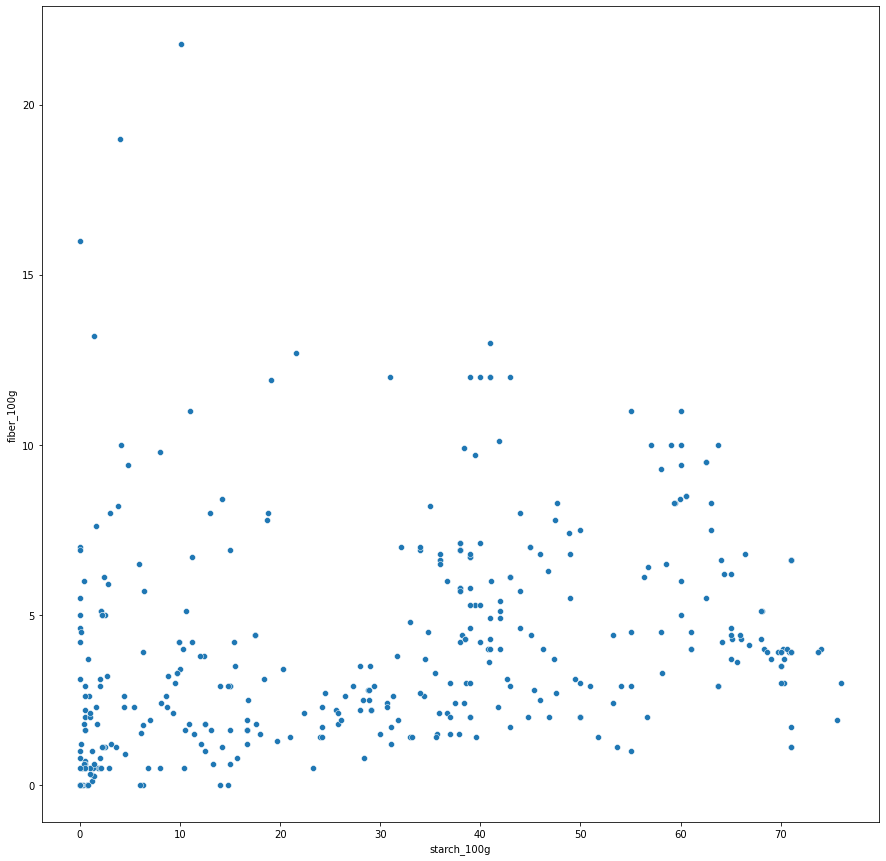

In [31]:
f = plt.figure(figsize=(15, 15))

sns.scatterplot(data=dataframe_purify, x="starch_100g", y="fiber_100g")

In [22]:
dataframe_purify.columns.tolist()

['code',
 'url',
 'product_name',
 'abbreviated_product_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'packaging_text',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_quantity',
 'nutriscore_score',
 'nutriscore_grade',
 'pnns_groups_1',
 'pnns_groups_2',
 'ecoscore_score_fr',
 'ecoscore_grade_fr',
 'main_category',
 'main_category_en',
 'image_url',
 'image_small_url',
 'image_ingredients_url',
 'image_ingredients_small_url',
 'image_nutrition_url',
 'image_nutrition_small_url',
 'energy-kj_100g',
 'energy-kcal_100g',
 'energy_100g',
 'energy-from-fat_100g',
 'fat_100g',
 'saturated-fat_100g',
 '-butyric-acid_100g',
 '-caproic-acid_100g',
 '-capric-acid_100g',
 '-lauric-acid_100g',
 '-myristic-acid_100g',
 '-palmitic-ac

In [52]:
dataframe_purify[dataframe_purify["sodium_100g"] > 6]


code                                                                                  url                 product_name abbreviated_product_name quantity  packaging packaging_tags packaging_text     brands brands_tags                             categories                           categories_tags                    categories_en emb_codes emb_codes_tags first_packaging_code_geo purchase_places stores      countries    countries_tags   countries_en  \
64       0000000005081                 http://world-en.openfoodfacts.org/product/0000000005081/salade-verte                 Salade verte                      NaN      NaN        NaN            NaN            NaN        NaN         NaN                                    NaN                                       NaN                              NaN       NaN            NaN                      NaN             NaN    NaN         France         en:france         France   
139      0000000018371   http://world-en.openfoodfacts.org/product/0000000018371/real-salt-granular-redmond           Real Salt Granular                      NaN      NaN        NaN            NaN            NaN    Redmond     redmond                                    NaN                                       NaN                              NaN       NaN            NaN                      NaN             NaN    NaN  United States  en:united-states  United States   
197      0000000033084           http://world-en.openfoodfacts.org/product/0000000033084/fine-sea-salt-unfi                Fine Sea Salt                      NaN      NaN        NaN            NaN            NaN       Unfi        unfi                                    NaN                                       NaN                              NaN       NaN            NaN                      NaN             NaN    NaN  United States  en:united-states  United States   
1346     0000946002915             http://world-en.openfoodfacts.org/product/0000946002915/chicken-boullion             Chicken boullion                      NaN      NaN        NaN            NaN            NaN        NaN         NaN                           Meals, Soups                         en:meals,en:soups                      Meals,Soups       NaN            NaN                      NaN             NaN    NaN  United States  en:united-states  United States   
1348     0000946004964                 http://world-en.openfoodfacts.org/product/0000946004964/iodized-salt                 Iodized salt                      NaN      NaN        NaN            NaN            NaN        NaN         NaN                  Groceries, Condiments                en:groceries,en:condiments             Groceries,Condiments       NaN            NaN                      NaN             NaN    NaN  United States  en:united-states  United States   
...                ...                                                                                  ...                          ...                      ...      ...        ...            ...            ...        ...         ...                                    ...                                       ...                              ...       ...            ...                      ...             ...    ...            ...               ...            ...   
1759090  9788892135802              http://world-en.openfoodfacts.org/product/9788892135802/diritto-privato              DIRITTO PRIVATO                      NaN      NaN        NaN            NaN            NaN        NaN         NaN                                    NaN                                       NaN                              NaN       NaN            NaN                      NaN             NaN    NaN          en:it          en:italy          Italy   
1759128  9789912408135                  http://world-en.openfoodfacts.org/product/9789912408135/jus-de-gris                  Jus de gris                      NaN      NaN        NaN            NaN            NaN        NaN         NaN

In [21]:
dataframe_purify[dataframe_purify["selenium_100g"] == 38.8]
dataframe.iloc[1025584]

code                                                                                                                                                                                                                                                                                                                                              3770013130113
url                                                                                                                                                                                                                                              http://world-en.openfoodfacts.org/product/3770013130113/kefir-de-fruits-gingembre-bio-le-labo-dumoulin-lld-cie
product_name                                                                                                                                                                                                                                                                                            

In [26]:
dataframe["carbohydrates_100g"].sort_values().head(100)

1025584   -1.0
625136     0.0
1424501    0.0
1424502    0.0
1144557    0.0
1424510    0.0
336392     0.0
336390     0.0
336388     0.0
1424511    0.0
336385     0.0
1376432    0.0
680279     0.0
336384     0.0
336383     0.0
1007021    0.0
336382     0.0
336373     0.0
336371     0.0
469951     0.0
1424544    0.0
100039     0.0
1424549    0.0
1424550    0.0
1006941    0.0
336349     0.0
336347     0.0
336341     0.0
469897     0.0
1424499    0.0
1424498    0.0
1424497    0.0
100103     0.0
336462     0.0
336459     0.0
336457     0.0
1564861    0.0
336456     0.0
1659933    0.0
336454     0.0
336451     0.0
336450     0.0
336449     0.0
1659926    0.0
336440     0.0
100087     0.0
336439     0.0
336430     0.0
1007124    0.0
1007120    0.0
469873     0.0
1007117    0.0
1424492    0.0
1424493    0.0
336394     0.0
1424494    0.0
1424495    0.0
100073     0.0
1424496    0.0
336339     0.0
336338     0.0
336334     0.0
336332     0.0
470041     0.0
1006883    0.0
336330     0.0
336328    

determiner les quantile avec scipy pour eliminer les valeur aberrantes
faire un pandas.dataframe.corr pour essayer de trouver une corelation entre deux variable (facteur 1 , variable egal, donc redondant et à sortir)
nettoyer pnns a cause de la casse (librairie nltk)
comparer les sucre et les glucide pour avoir l'indice glycemique  
--------------------------------  
essayer de créer un chiffre pour le quintile de façon automatique en regardant le max de la valeur encore dans le dataframe et regardant le facteur entre cette valeur et celle sorti juste au dessus
présenter ça sous forme d'un graphe en montrant les valeurs exclus


In [22]:
dataframe2 = dataframe.drop(dataframe[dataframe["carbohydrates_100g"] > 100].index)
dataframe2 = dataframe2.drop(dataframe2[dataframe2["carbohydrates_100g"] < 0].index)
dataframe2 = dataframe2.drop(dataframe2[dataframe2["sodium_100g"] > 100].index)
dataframe2 = dataframe2.drop(dataframe2[dataframe2["sodium_100g"] < 0].index)

sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 15))
dataframe2 = dataframe2.sort_values(by=['carbohydrates_100g'],ascending=False)
sns.set_color_codes("pastel")
sns.barplot(x='carbohydrates_100g', y=dataframe2.index, data=dataframe2,label='carbohydrates_100g', color="b")
ax.legend(ncol=1, loc="lower right", frameon=True,fontsize='large')
ax.xaxis.tick_top()    
# if title == "Study years in selected countries":
#     for i,value in enumerate(dataframe2[sort_by]):
#         ax.text(value+3/xmin, i + 0.2,str(value),fontsize=15)
# else:
#     for i,value in enumerate(dataframe2[sort_by]):
#         ax.text(value+3/xmin, i + 0.2,str(int(value)),fontsize=15)    
plt.xlabel( xlabel="title",fontsize=18)
ax.set(xlim=(0, 100), ylabel="", xlabel='title')
sns.despine(left=True, bottom=True)

In [ ]:

# display(dataframe2)#["carbohydrates_100g"].sort_values(ascending=False).head(1))
sns.set_theme(style="ticks")
# diamonds = sns.load_dataset("diamonds")

f, ax = plt.subplots(figsize=(10, 6))
sns.despine(f)

sns.histplot(
    dataframe2,
    x="carbohydrates_100g",#hue="sodium_100g",
    #multiple="stack",
    palette="light:m_r",
    edgecolor="0.3",
    linewidth=0.5,
#     log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([0, 20, 40, 60, 80,100])

In [ ]:
sns.set_theme(style="whitegrid")


# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="omega-3-fat_100g", y="omega-9-fat_100g",
                hue="clarity", size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=dataframe2, ax=ax)